<a href="https://colab.research.google.com/github/chrisjulio/INFO7017/blob/main/T3_1_Keras01_Christiano_Guilherme_Marcio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color="#ff9900"> **CNN com Keras**</font>
---

As <font color="#66ffff"> Redes Neurais Convolucionais (Convolutional Neural Networks - **CNNs**)</font> são uma classe de algoritmos de aprendizado profundo projetados especificamente para analisar dados visuais, como imagens e vídeos. Elas são amplamente utilizadas em tarefas de visão computacional, como classificação de imagens, detecção de objetos e segmentação de imagens. As CNNs alcançaram um sucesso notável nessas áreas, superando o desempenho humano em alguns casos.

O *building block* básico de uma CNN é uma `convolutional layer`. A operação de convolução envolve a aplicação de um conjunto de filtros aprendíveis (também conhecidos como *kernels*) aos dados de entrada. Esses filtros deslizam (*slide over*) sobre o espaço de entrada, realizando multiplicação elemento a elemento e agregando os resultados através da soma para produzir mapas de características. Os filtros capturam padrões ou características locais presentes na entrada, como bordas, texturas ou formas.

As CNNs também incorporam outras camadas para aprimorar suas capacidades. Um tipo comum é a camada de *pooling*, que reduz as dimensões espaciais dos mapas de características, retendo as informações mais relevantes. O `max pooling` é uma operação de *pooling* popular que seleciona o valor máximo dentro de cada janela de *pooling*, reduzindo o tamanho dos mapas de características.

Outra camada fundamental nas CNNs é a camada de ativação, que introduz não-linearidades na rede. Funções de ativação comuns usadas em CNNs incluem a `Rectified Linear Units (ReLU)`, que define valores negativos como zero e mantém os valores positivos inalterados, e variantes como `Leaky ReLU` e ``Parametric ReLU``. Essas não-linearidades permitem que a rede modele relações complexas entre os dados de entrada e a saída desejada.

As CNNs geralmente consistem em várias camadas convolucionais seguidas por camadas de pooling e ativação. As camadas finais de uma CNN são as camadas totalmente conectadas, também conhecidas como camadas densas, que levam as características de alto nível aprendidas das camadas anteriores e as mapeiam para as classes de saída ou previsões. Essas camadas são frequentemente seguidas por uma função de ativação `softmax` para produzir distribuições de probabilidade sobre as classes.

Durante o treinamento, as CNNs empregam um processo chamado retropropagação, em que a rede aprende os valores ótimos de seus parâmetros ajustando-os iterativamente para minimizar uma função de perda especificada. Esse ajuste é feito por meio de algoritmos de otimização como `Stochastic Gradient Descent (SGD)` ou suas variantes.

Para treinar CNNs de forma eficaz, é necessário um grande conjunto de dados rotulados. A rede aprende a reconhecer vários padrões e características generalizando a partir dos exemplos nos dados de treinamento. Uma vez treinadas, as CNNs podem ser implantadas para fazer previsões sobre novos dados não vistos.

Resumindo, as **CNNs são um tipo de modelo de aprendizado profundo projetado para análise de dados visuais**. Elas aproveitam camadas convolucionais para extrair características locais, camadas de *pooling* para reduzir dimensões espaciais e camadas de ativação para introduzir não-linearidades. Empilhando essas camadas, as CNNs podem **aprender representações hierárquicas dos dados de entrada**, permitindo que realizem tarefas como classificação de imagens, detecção de objetos e muito mais.

# **Keras**</font>
---

<font color="#66ffff">**Keras**</font> (https://keras.io/) é uma biblioteca de rede neural de código aberto escrita em Python. É projetada para ser amigável ao usuário, modular e extensível, fornecendo uma interface de alto nível para construir e treinar modelos de aprendizado profundo. O Keras é construído em cima de outros *frameworks* populares de aprendizado profundo como ``TensorFlow`` (https://www.tensorflow.org/), Microsoft Cognitive Toolkit -``CNTK`` (https://learn.microsoft.com/en-us/cognitive-toolkit/) e ``Theano`` (https://github.com/Theano/Theano), o que permite que ele aproveite o poder e desempenho desses *frameworks* enquanto fornece uma interface mais acessível e fácil de usar. Tais *frameworks* são o *backend* computacional do Keras.

O próprio ``TensorFlow`` vem com uma implementação particular do Keras, ``tf.keras``. Há suporte apenas ao ``TensorFlow`` como *backend*, oferecendo a vantagem de suporte ao TensorFlow Data API.

Além das bibliotecas ``Numpy``, ``Pandas`` e ``Matplotlib``, vamos utilizar ``keras`` de ``tensorflow``.


In [ ]:
# o código abaixo foi modificado para economizar memória, cpu, gpu e créditos do colab :)


# Limpeza e preparação do ambiente
import gc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import backend as K

keras.models.Sequential()

# Limpar sessões anteriores para liberar memória da GPU
K.clear_session()
gc.collect()

# Exibe a versão do Keras e verifica GPU
print(f'Keras: {keras.__version__}')
print("GPU disponível:", tf.config.list_physical_devices('GPU'))

Keras: 3.8.0
GPU disponível: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


Criação do Modelo
--

Vamos criar um modelo CNN simples. Mas antes vamos revisar os tipos de camadas (*layers*) tipicamente encontrados em uma CNN e sua representação em Keras.

``Sequential``é um modelo Keras composto de camadas empilhadas e conectadas sequencialmente entre si. Uma CNN pode ser instanciada como um modelo ``Sequential`` porque cada camada tem exatamente uma entrada e uma saída, e são empilhadas juntas para formar toda a rede.

Tipicamente, camadas em uma CNN são empilhadas da seguinte forma:
<font color="#ff9900">
par de camadas **Convolutional-Pooling** → par de camadas **Convolutional-Pooling** → uma camada **flattened** → camadas **Multiple dense**
</font>

> Cada *convolutional layer* é criada com um objeto da classe ``Conv2D`` que aplica a operação de convolução em um espaço 2D. Ou seja, o *kernel* (*filter*) é deslocado sobre a imagem de entrada.

Dentre os parâmetros importantes de ``Conv2D`` temos:
- ``filters`` ➡️ O número de filtros (*kernels*), também chamado de profundidade do mapa de características. É um número inteiro. Normalmente, aumentamos o número de filtros em cada camada convolucional, p.ex.: 16, 32, 64, 128, etc.

- ``kernel_size`` ➡️ Especifica a altura e largura da *kernel window* (convolução). Número inteiro ou uma tupla de dois números inteiros, como $(3, 3)$, $(5, 5)$, etc. Na maioria dos casos, a janela é um quadrado com a mesma altura e largura, podendo ser especificado como um único número inteiro, p. ex.: 3 para uma janela $(3, 3)$.

- ``strides`` ➡️ O número de *steps* (pixels) que movemos o filtro sobre a imagem de entrada. Recebe uma tupla para os passos ao longo da altura e largura. Se a altura e largura forem iguais, podemos usar um número inteiro. O padrão é $(1, 1)$.

- ``padding`` ➡️ Existem duas opções: ``valid`` ou ``same``. ``valid`` é sem padding e ``same`` resulta em *padding* com zeros de forma que o tamanho do *feature map* seja o mesmo que o tamanho da entrada quando ``strides=1``.

- ``activation`` ➡️ O tipo de função de ativação a ser usada na camada convolucional. O padrão é nenhuma ativação, o que é equivalente à ativação linear ou identidade. Geralmente, usamos a função de ativação ``relu`` em cada camada convolucional. Recordando, a função ReLU pode ser definida como
\begin{align}
  f(x) = x^+ = max(x, 0) = \left\{
        \begin{array}{cl}
             x & x \gt 0 \\
             0 & otherwise             
        \end{array}
        \right.
\end{align}

sendo $x$ o neurônio de entrada.

- ``input_shape`` ➡️ Indica a altura, largura e profundidade da entrada como uma tupla de inteiros. Ou seja, este é o tamanho da imagem de entrada. É obrigatório especificar esse argumento na primeira camada convolucional se for a primeira camada no modelo imediatamente após a camada de entrada. Esse argumento não é incluído em outras camadas convolucionais intermediárias.

> Uma instância de ``MaxPooling2D`` representa uma *pooling layer*. Normalmente é usada em par com a camada convolucional. Existem dois tipos: **Max pooling** e **Average pooling**.

Dentre os parâmetros importantes de ``MaxPooling2D`` temos:

- ``pool_size`` ➡️ O tamanho da *pooling window*, sendo o padrão $(2, 2)$. Se a altura e largura forem iguais, podemos usar um número inteiro.

- ``strides`` ➡️ O número de *steps* (pixels) que movemos a ``pooling window``sobre o *feature map* em cada *step pooling*. Recebe uma tupla para os passos ao longo da altura e largura. Se a altura e largura forem iguais, podemos usar um número inteiro. O padrão é ``None`` usando assim ``pool_size``.

- ``padding`` ➡️ Existem duas opções: ``valid`` ou ``same``. ``valid`` é sem padding e ``same`` resulta em *padding* com zeros de forma que o tamanho do *feature map* seja o mesmo que o tamanho da entrada quando ``strides=1``.


> Nas CNNs existe uma *flattened layer* entre a camada final de *pooling* e a primeira camada totalmente conectada (*dense layer*). A *flattned layer* poder vista como uma coluna única. que armazena os valores de entrada. No Keras usamos a classe ``Flatten``.


> A camada final de uma CNN normalmente é uma *fully connected (dense) layer*. Em Keras temos a classe ``Dense`` e dentre seus parâmetros destacamos:

- ``units`` ➡️ Número de nodos (*units*) na camada. Um valor inteiro.

- ``activation`` ➡️ Tipo de função de ativação. Padrão é ``None``, isto é sem ativação (*linear*/*identity*).

- ``input_shape`` ➡️ Só necessário informar se for a primeira camada da CNN.

Arquitetura da CNN
--
Utilizaremos uma rede neural convolucional inspirada na arquitetura VGG simplificada para classificar imagens da base **CIFAR-10**. Esse conjunto de dados contém **imagens coloridas de tamanho 32x32 com 3 canais (RGB)**, distribuídas em **10 classes** (avião, automóvel, pássaro, gato, cervo, cachorro, sapo, cavalo, navio e caminhão).

A arquitetura será composta por **seis camadas convolucionais** com filtros 3x3, intercaladas com **camadas de max pooling 2x2**, seguidas de uma camada de **flatten** e duas camadas densas (fully connected), sendo a última com ativação **SoftMax** para previsão de probabilidades entre as classes.



In [ ]:
kernel = (3, 3)  # conforme enunciado da atividade
pool = (2, 2)    # pooling padrão

model = keras.models.Sequential([
    keras.Input(shape=(32, 32, 3)),  # define a entrada explicitamente

    keras.layers.Conv2D(64, kernel, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=pool),

    keras.layers.Conv2D(128, kernel, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=pool),

    keras.layers.Conv2D(256, kernel, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=pool),

    keras.layers.Flatten(),

    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])


In [ ]:
print(model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     1,048,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,422,218 (5.43 MB)

 Trainable params: 1,422,218 (5.43 MB)

 Non-trainable params: 0 (0.00 B)

None


# Nota:

O método summary() do objeto model exibe todas as camadas da rede, seus formatos de saída e a quantidade de parâmetros treináveis.

No caso desta CNN, temos aproximadamente 1,42 milhão de parâmetros treináveis, resultado da combinação de múltiplas camadas convolucionais e densas.

Isso representa uma ordem de magnitude maior do que modelos MLP simples aplicados a bases como MNIST ou Fashion MNIST, evidenciando o poder expressivo (e o custo computacional) de arquiteturas profundas.

Observando o resultado do método summary(), a **coluna do meio** exibe a forma de saída de cada camada. Por exemplo, a primeira camada Conv2D tem uma saída de (None, 32, 32, 64), indicando as dimensões do feature map após a aplicação da primeira operação de convolução.

O tamanho do mapa de características é de **32×32**, e a **profundidade é 64** porque estão sendo utilizados 64 filtros nessa camada.

O primeiro valor na tupla é None, que representa o **tamanho do lote (batch size)**. Esse valor será definido dinamicamente no momento do treinamento, quando os dados forem fornecidos ao modelo.

A **coluna mais à direita** mostra o número de parâmetros treináveis em cada camada. Note que as camadas de **pooling** e **flatten** não possuem parâmetros, pois apenas realizam operações estruturais (como redução espacial ou reorganização de dados), sem pesos a serem ajustados durante o treinamento.

As camadas do modelo também podem ser acessadas individualmente.

In [ ]:
print(model.layers)

conv1 = model.layers[0]  # first convolutional layer

print(f'\nFirst convolutional layer name: {conv1.name}')

[<Conv2D name=conv2d_3, built=True>, <MaxPooling2D name=max_pooling2d_3, built=True>, <Conv2D name=conv2d_4, built=True>, <MaxPooling2D name=max_pooling2d_4, built=True>, <Conv2D name=conv2d_5, built=True>, <MaxPooling2D name=max_pooling2d_5, built=True>, <Flatten name=flatten_1, built=True>, <Dense name=dense_2, built=True>, <Dense name=dense_3, built=True>]

First convolutional layer name: conv2d_3


E os parâmetros de uma camada pode ser obtidos com ``get_weights``.

Perceba os pesos (``weights``) inicializados randomicamente e os termos bias com zero.

In [ ]:
weights, biases = conv1.get_weights()

print(f'Layer weights shape:\n{weights.shape}')
print(f'\nLayer weights:\n{weights}')

print(f'\nLayer biases shape:\n{biases.shape}')
print(f'\nBiases:\n{biases}')

Layer weights shape:
(3, 3, 3, 64)

Layer weights:
[[[[-0.03368988  0.03683697  0.0219678  ... -0.02761752  0.0782228
    -0.04422497]
   [ 0.07282703  0.06293297  0.0751268  ...  0.03704642  0.02001992
     0.09211586]
   [-0.01625375 -0.02394512 -0.05637936 ...  0.07581823 -0.03009775
    -0.09229784]]

  [[ 0.03647493  0.0080049   0.05298316 ... -0.00323675  0.069272
    -0.0530017 ]
   [-0.03547294  0.05101272  0.0926431  ...  0.05343029 -0.06008902
     0.01533675]
   [-0.07916818 -0.03064869  0.09780589 ... -0.07636082 -0.0160711
     0.03066836]]

  [[-0.00137512  0.02887723  0.0255367  ...  0.03143109  0.06721109
    -0.03157844]
   [ 0.03163105 -0.03699774 -0.0804529  ... -0.08786555 -0.0375585
    -0.07096995]
   [-0.0088403   0.01278727 -0.09417772 ...  0.0957257  -0.08936489
     0.09299785]]]


 [[[-0.06649854 -0.04132391  0.09407127 ... -0.06159994 -0.02273859
    -0.08929383]
   [ 0.05798569  0.03735466 -0.0925628  ...  0.03109324 -0.01507366
    -0.0294205 ]
   [-0.0809

Importação de um *Dataset* e Análise Exploratória
--

Vamos usar o *dataset* <font color="#ff9900">**Fashion MNIST** </font> (https://github.com/zalandoresearch/fashion-mnist) que é uma coleção de 70.000 imagens em escala de cinza de itens de vestuário, cada uma com tamanho de $28 \times 28$ pixels. Foi projetado como um substituto do conjunto de dados MNIST (http://yann.lecun.com/exdb/mnist/) mais tradicional, que contém dígitos manuscritos. Os itens de vestuário Fashion MNIST incluem itens como camisetas, calças, vestidos, tênis e sandálias, entre outros. É um *dataset* mais desafiador do que o MNIST original, pois contém imagens mais complexas e variadas. Também é mais relevante para aplicações do mundo real, pois imita de perto o tipo de imagens que são comumente encontradas em aplicativos de comércio eletrônico e *sites* de compras *on-line*.



In [ ]:
cifar10 = keras.datasets.cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Carregada a base, vamos investigar o conteúdo. Cada imagem é representada como um array de dimensões **32×32×3**, ou seja, **32 pixels de altura, 32 pixels de largura e 3 canais de cor (RGB)**. Os valores dos pixels estão na faixa de 0 a 255, representando intensidades de cor inteiras (inteiros sem sinal), e ainda **não foram normalizados para floats**.

Dataset shape: (50000, 32, 32, 3)
First instance shape: (32, 32, 3)

First instance:
 [[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


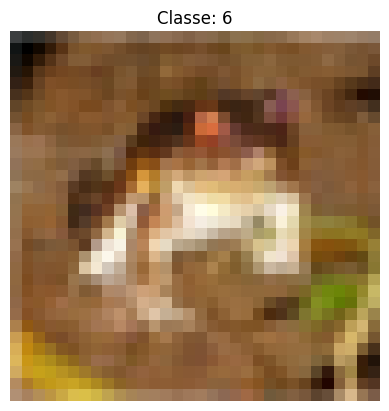

In [ ]:
print(f'Dataset shape: {X_train.shape}')
print(f'First instance shape: {X_train[0].shape}')
print(f'\nFirst instance:\n {X_train[0]}')

import matplotlib.pyplot as plt

plt.imshow(X_train[0])
plt.title(f"Classe: {y_train[0][0]}")
plt.axis('off')
plt.show()

Olá sapinho novamente... 🐸

Class name of first instance: Frog


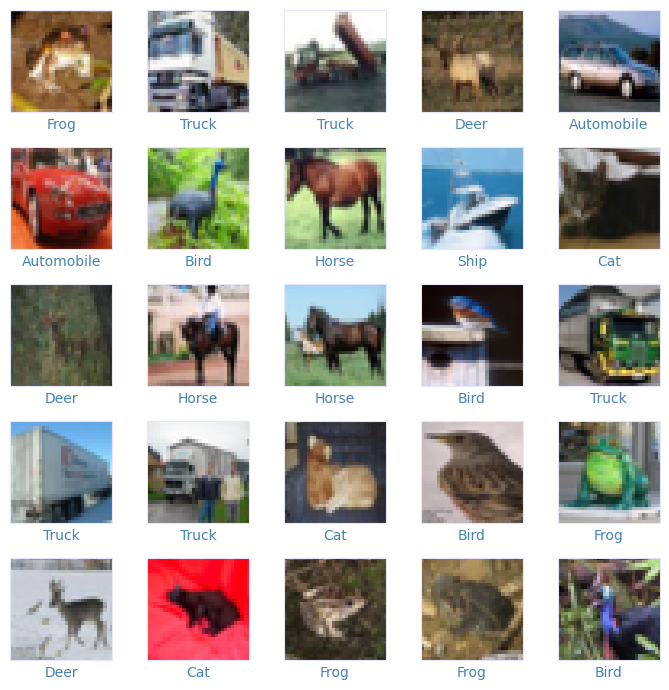

In [ ]:
# Nomes corretos das classes CIFAR-10
class_names = [
    "Airplane", "Automobile", "Bird", "Cat", "Deer",
    "Dog", "Frog", "Horse", "Ship", "Truck"
]

# Verifica a classe da primeira instância
# Access the integer value from the one-element array
print(f'Class name of first instance: {class_names[y_train[0][0]]}')

# Visualização das primeiras 25 imagens com suas classes
plt.rc('axes', edgecolor='lavender')
fig = plt.figure(figsize=(7, 7))

for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])  # sem cmap para manter cores RGB
    # Access the integer value from the one-element array for each label
    plt.xlabel(class_names[y_train[i][0]], color='steelblue')

plt.tight_layout()
plt.show()

Observe que o **dataset CIFAR-10 já está dividido** em conjuntos de treinamento e teste. No entanto, vamos criar um **conjunto adicional de validação**, chamado X_valid, juntamente com os respectivos rótulos y_valid. Para isso, **reservaremos 5.000 instâncias do conjunto de treinamento original** para validação, e utilizaremos o restante para o treinamento efetivo do modelo.

Como utilizaremos uma **Rede Neural Convolucional (CNN)** treinada com o algoritmo **Gradient Descent (GD)**, é fundamental **normalizar os dados de entrada**. Neste caso, vamos **escalar os valores dos pixels para a faixa de 0 a 1**, dividindo-os por 255. Isso melhora a estabilidade e a eficiência do processo de aprendizado.

In [ ]:
# Normaliza todo o conjunto de treino e teste
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

# Divide o conjunto de validação (primeiras 5.000 instâncias)
X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]


Compilação
--

Antes de o modelo ser treinado, ele precisa ser **compilado** por meio do método compile(). Nesse momento, especificamos qual será a **função de perda** (loss) e o **otimizador** a ser utilizado. Opcionalmente, podemos definir as **métricas de avaliação** que desejamos acompanhar durante o processo de treinamento, como por exemplo, a **acurácia** (accuracy).

A função de perda escolhida será sparse_categorical_crossentropy, adequada para tarefas de **classificação com rótulos inteiros** (esparsos), onde cada instância pertence exatamente a **uma entre várias classes mutuamente exclusivas** — no caso do **CIFAR-10**, as classes são representadas por **índices de 0 a 9**.

O otimizador utilizado será o **Adam** *(adaptive moment estimation)*, que ajusta automaticamente a taxa de aprendizado com base em estimativas de momentos de gradiente (média e variância). Ele combina as abordagens de **momentum e adaptação de escala**, proporcionando convergência mais rápida e maior estabilidade, especialmente eficaz no treinamento de redes convolucionais profundas (CNNs).

O valor padrão da taxa de aprendizado (learning rate) no otimizador Adam é 0.001 (ou 1e−3), valor que adotaremos neste experimento.

Para acompanhar o desempenho do modelo durante o treinamento, utilizaremos a métrica sparse_categorical_accuracy. Essa métrica compara diretamente os **rótulos inteiros** previstos com os rótulos reais, sendo ideal para cenários onde os labels **não foram codificados como one-hot**.

Com a compilação finalizada, nosso modelo está pronto para ser treinado. Vamos em frente!

In [ ]:
# Adam optimizer
from tensorflow.keras.optimizers import Adam

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(learning_rate=1e-3),
              metrics=['sparse_categorical_accuracy'])


Treinamento
--

Para treinar o modelo, utilizamos o método fit(), fornecendo como argumentos o conjunto de treinamento X_train, os rótulos correspondentes y_train, o número de épocas (epochs) e os dados de validação (X_valid e y_valid).

Durante o treinamento, o modelo atualiza seus pesos por meio do **algoritmo de otimização Adam**, minimizando a função de perda com base nos gradientes calculados para cada lote de dados (*batch*). Em cada época, todo o conjunto de treinamento é percorrido uma vez. O número de **épocas** determina quantas vezes esse ciclo completo será repetido.

Ao utilizar dados carregados diretamente em arrays (como é o caso do CIFAR-10), o número de **batches por época** é determinado automaticamente com base no **tamanho do lote** (batch_size) e na quantidade de amostras de treinamento. Por exemplo, com batch_size=64 e 45.000 imagens para treino, teremos aproximadamente 704 iterações por época **(45000 / 64 ≈ 704)**.

Aumentar o número de épocas permite que o modelo veja os dados várias vezes, o que pode **melhorar o aprendizado e a generalização**. No entanto, é importante encontrar um equilíbrio: muitas épocas podem levar ao **overfitting**, quando o modelo se ajusta demais aos dados de treino e perde desempenho em dados não vistos.

---

> 💡 **Nota**:
Destaca-se que a **validação é opcional**.

---


In [ ]:
history = model.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=64,  # você pode ajustar conforme a capacidade da GPU
    validation_data=(X_valid, y_valid)
)

Epoch 1/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - loss: 1.6898 - sparse_categorical_accuracy: 0.3798 - val_loss: 1.0878 - val_sparse_categorical_accuracy: 0.6086
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - loss: 0.9946 - sparse_categorical_accuracy: 0.6494 - val_loss: 0.8920 - val_sparse_categorical_accuracy: 0.6754
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.7582 - sparse_categorical_accuracy: 0.7342 - val_loss: 0.8489 - val_sparse_categorical_accuracy: 0.6994
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.6142 - sparse_categorical_accuracy: 0.7841 - val_loss: 0.7377 - val_sparse_categorical_accuracy: 0.7488
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.4988 - sparse_categorical_accuracy: 0.8259 - val_loss: 0.8017 - val_sparse_categorical_accuracy: 0.7250
Epoch 6/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.3866 - sparse_categorical_accuracy: 0.8628 - val_loss: 0.7648 - val_sparse_categorical_accuracy: 0.7608
E

> Salvar o Modelo

Antes de prosseguir vamos salvar o modelo treinado.

No Keras, o método ``save_weights`` salva os pesos de um modelo treinado em um arquivo. Os pesos se referem aos parâmetros do modelo, como os pesos e os viéses das camadas da rede neural. Salvar os pesos permite armazenar as informações aprendidas de um modelo treinado para que possam ser reutilizadas ou carregadas em outro modelo posteriormente. Nesse método especificamos um nome de arquivo que será salvo no formato ``h5``.

O formato ``h5`` (*Hierarchical Data Format version 5*), é um formato de arquivo comumente usado em computação científica e análise de dados. É um formato flexível e eficiente para armazenar e organizar grandes quantidades de dados. No contexto do Keras, o formato ``h5`` é frequentemente usado para salvar os pesos de um modelo.

Os pesos salvos no arquivo ``.h5`` podem ser carregados em outro modelo usando o método ``load_weights`` no Keras. Isso permite transferir os parâmetros aprendidos de um modelo para outro ou continuar o treinamento de um modelo a partir de um ponto de verificação salvo.

In [ ]:
model.save_weights('./model.weights.h5', overwrite=True)

In [ ]:
!ls -lh *.h5

-rw-r--r-- 1 root root 17M May 20 21:02 model.weights.h5


> Avaliação do Treinamento

Vamos plotar as curvas de acurácia e *loss*.

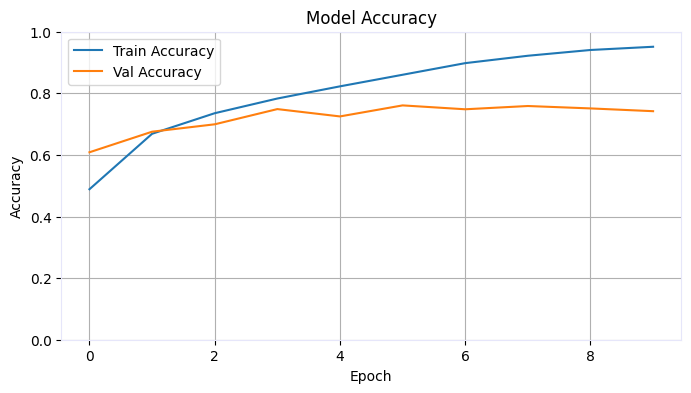

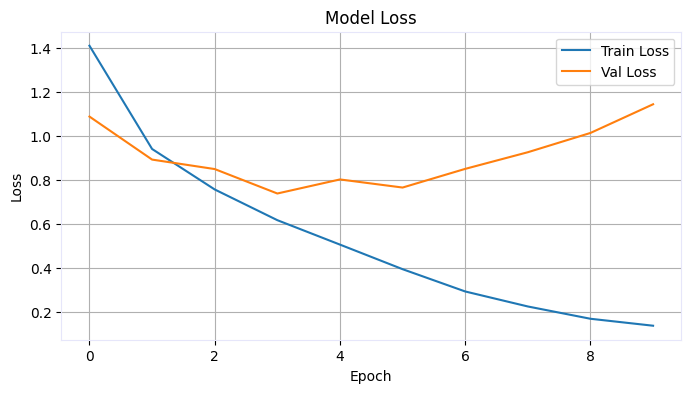

In [ ]:
# Plot: Accuracy
plt.figure(figsize=(8, 4))
plt.plot(history.history['sparse_categorical_accuracy'], label='Train Accuracy')
plt.plot(history.history['val_sparse_categorical_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.grid(True)
plt.legend()
plt.show()

# Plot: Loss
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.1921 - sparse_categorical_accuracy: 0.7461


[1.1939815282821655, 0.7421000003814697]

Conseguimos $74\%$. Vamos abordar mais ajustes adiante.

Classificação
--

Uma vez treinado o modelo podemos fazer predições com o método ``predict``.

Vamos ver como o modelo comporta-se com as vinte primeiras instâncias.

In [ ]:
X_new = X_test[:20]
y_proba = model.predict(X_new)

print(f'Probability scores:\n {y_proba.round(2)}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 599ms/step
Probability scores:
 [[0.   0.   0.   0.98 0.   0.02 0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   1.   0.  ]
 [0.11 0.   0.   0.   0.   0.   0.   0.   0.89 0.  ]
 [0.11 0.   0.   0.   0.   0.   0.   0.   0.89 0.  ]
 [0.   0.   0.   0.09 0.01 0.   0.89 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   1.   0.   0.   0.  ]
 [0.   0.98 0.   0.   0.   0.   0.   0.   0.   0.01]
 [0.   0.   0.74 0.01 0.01 0.   0.24 0.   0.   0.  ]
 [0.   0.   0.   0.75 0.02 0.23 0.   0.   0.   0.  ]
 [0.   0.99 0.   0.   0.   0.   0.   0.   0.01 0.  ]
 [0.23 0.   0.01 0.   0.1  0.62 0.   0.   0.04 0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   1.  ]
 [0.   0.   0.   0.   0.   1.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   1.  ]
 [0.   0.   0.   0.   0.   0.   0.01 0.   0.99 0.  ]
 [0.   0.   0.   0.27 0.   0.69 0.   0.04 0.   0.  ]
 [0.   0.   0.   0.   0.   0.01 0.   0.

# Previsões junto com as imagens:

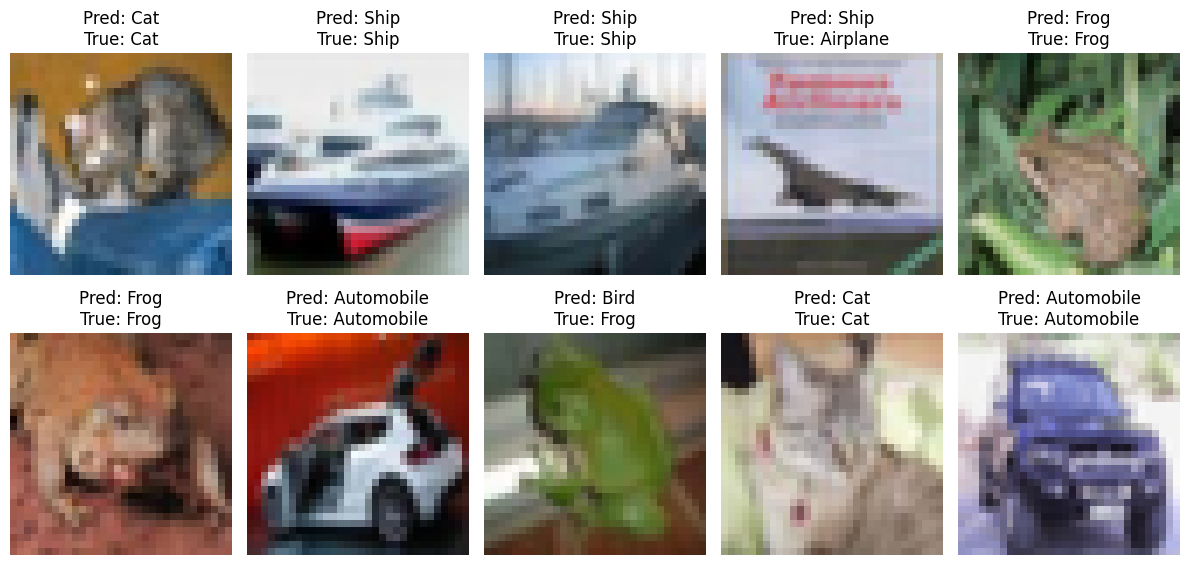

In [ ]:
plt.figure(figsize=(12, 6))
# Calculate predicted classes for the first 20 images
y_pred_all = np.argmax(y_proba, axis=1)

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i])
    plt.axis('off')
    # Use the pre-calculated predicted class for the current image
    plt.title(f"Pred: {class_names[y_pred_all[i]]}\nTrue: {class_names[y_test[i][0]]}") # Access the single value in y_test
plt.tight_layout()
plt.show()

O modelo estima uma probabilidade por classe.

Mas, quais são essas classes?

In [ ]:
classes_y = np.argmax(y_proba, axis=1)

print(classes_y)

print(f'Predicted classes:\n {np.array(class_names)[classes_y]}')

[3 8 8 8 6 6 1 2 3 1 5 9 5 7 9 8 5 7 8 6]
Predicted classes:
 ['Cat' 'Ship' 'Ship' 'Ship' 'Frog' 'Frog' 'Automobile' 'Bird' 'Cat'
 'Automobile' 'Dog' 'Truck' 'Dog' 'Horse' 'Truck' 'Ship' 'Dog' 'Horse'
 'Ship' 'Frog']


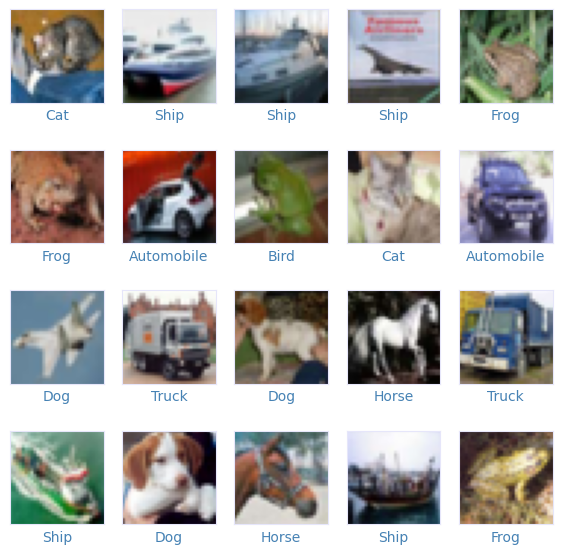

In [ ]:
plt.rc('axes',edgecolor='lavender')

fig = plt.figure(figsize=(7, 7))

for i in range(20):  # First 20 instances
    plt.subplot(4, 5, i + 1)

    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    plt.imshow(X_new[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[classes_y[i]], color='steelblue')

plt.show()

Finalmente vamos ver o comportamento da nossa CNN em todo o conjunto de teste. Lembrando que temos 1000 instâncias por classe.

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Accuracy:0.74

[[689  16  48  15  20  14   8  11 134  45]
 [  9 837   2   3   4   9  10   3  30  93]
 [ 48   3 649  51  84  69  26  33  26  11]
 [ 18   3  66 495  73 202  44  49  27  23]
 [ 17   3  41  39 713  59  19  79  25   5]
 [  9   1  40  98  43 699  19  65  14  12]
 [  7   4  41  53  43  43 772  11  11  15]
 [ 11   3  27  21  53  59   1 802  10  13]
 [ 19  20  11   6   3  11   2   5 901  22]
 [ 11  42   7   9   8   6   3  11  39 864]]


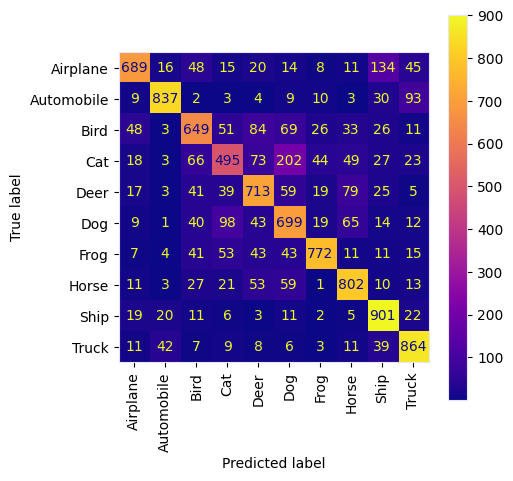

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

y_proba = model.predict(X_test)

test_pred = np.argmax(y_proba, axis=1)

# Accuracy
acc = accuracy_score(test_pred, y_test)
print(f'Accuracy:{acc:.2f}\n')

# Confusion matrix
cm = confusion_matrix(y_test, test_pred)
print(confusion_matrix(y_test, test_pred))


fig, ax = plt.subplots(figsize=(5, 5))

ConfusionMatrixDisplay.from_predictions(
    y_test, test_pred, display_labels=class_names, xticks_rotation="vertical",
    ax=ax, colorbar=True, cmap="plasma")

plt.show()

Vamos melhorar isso tudo que tá ai...

Agora que aprendemos como fazer, vamos aplicar os ajustes, desde o princípio, em um bloco de código condensado, para podermos só executar e analisar, sem precisar passo a passo acompanhar a evolução.

# Experimento 2:

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 669,354 (2.55 MB)

 Trainable params: 669,354 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

None
[<Conv2D name=conv2d_6, built=True>, <Conv2D name=conv2d_7, built=True>, <MaxPooling2D name=max_pooling2d_6, built=True>, <Conv2D name=conv2d_8, built=True>, <Conv2D name=conv2d_9, built=True>, <MaxPooling2D name=max_pooling2d_7, built=True>, <Conv2D name=conv2d_10, built=True>, <Conv2D name=conv2d_11, built=True>, <MaxPooling2D name=max_pooling2d_8, built=True>, <Flatten name=flatten_2, built=True>, <Dense name=dense_4, built=True>, <Dense name=dense_5, built=True>]

First convolutional layer name: conv2d_6
Layer weights shape:
(3, 3, 3, 32)

Layer weights:
[[[[-0.11888698  0.017167    0.12610318  0.11022153 -0.06002911
    -0.01042792  0.08458804 -0.07132128  0.13784717  0.09848107
    -0.02802072 -0.00391075 -0.10070568  0.05680239 -0.01643527
     0.08176368  0.01139055  0.0454025   0.00899877  0.03734808
    -0.13494927  0.10485926  0.0511626   0.06642358  0.05495715
    -0.10027947 -0.04210065  0.09095718  0.07883301  0.0260537
     0.03978916  0.04492554]
   [ 0.06718089 -0

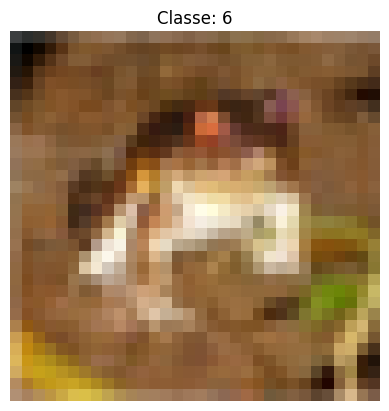

Class name of first instance: Frog


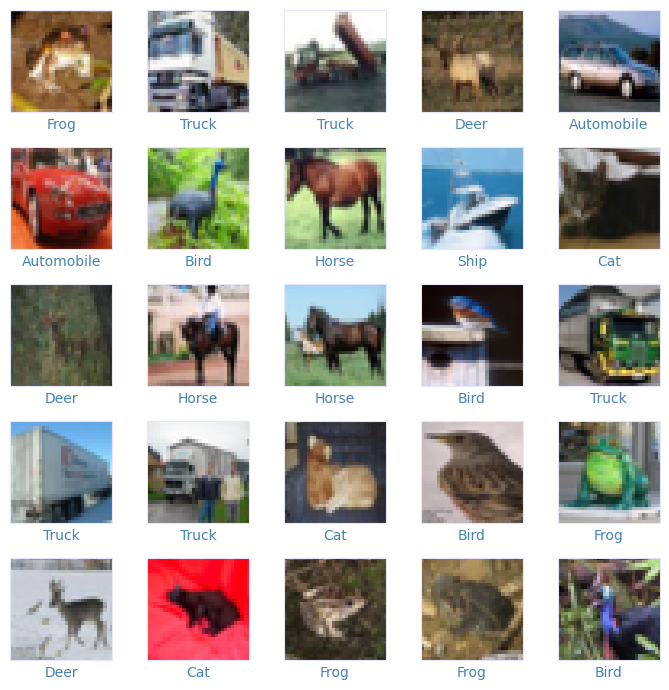

Epoch 1/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 14s 13ms/step - loss: 1.7956 - sparse_categorical_accuracy: 0.3324 - val_loss: 1.1980 - val_sparse_categorical_accuracy: 0.5766
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - loss: 1.0689 - sparse_categorical_accuracy: 0.6148 - val_loss: 0.8840 - val_sparse_categorical_accuracy: 0.6798
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.8138 - sparse_categorical_accuracy: 0.7147 - val_loss: 0.7897 - val_sparse_categorical_accuracy: 0.7238
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.6484 - sparse_categorical_accuracy: 0.7704 - val_loss: 0.7221 - val_sparse_categorical_accuracy: 0.7444
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.5306 - sparse_categorical_accuracy: 0.8112 - val_loss: 0.7749 - val_sparse_categorical_accuracy: 0.7318
Epoch 6/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.4192 - sparse_categorical_accuracy: 0.8514 - val_loss: 0.6767 - val_sparse_categorical_accuracy: 0.7662
E

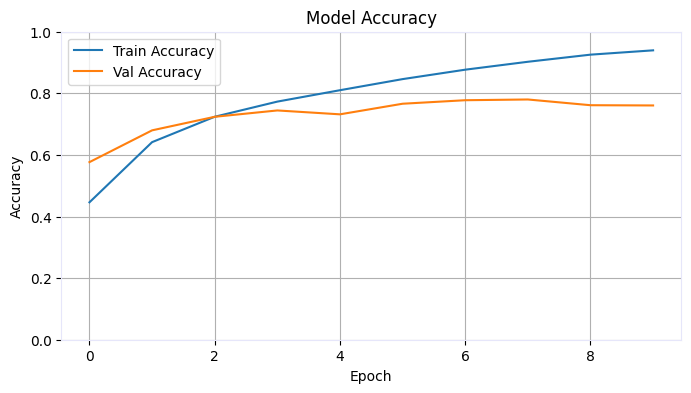

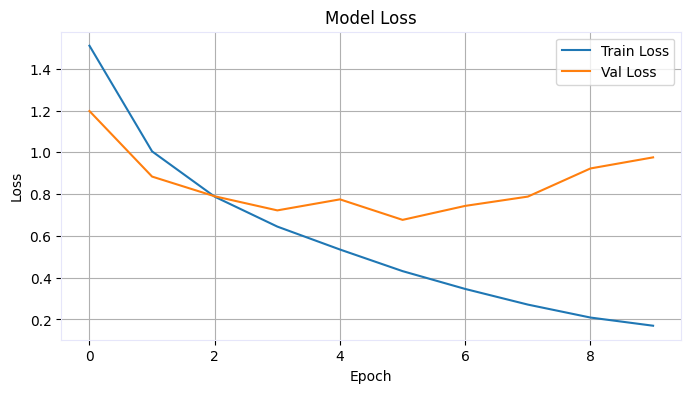

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.0523 - sparse_categorical_accuracy: 0.7564
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 589ms/step
Probability scores:
 [[0.   0.   0.   0.85 0.   0.15 0.   0.   0.   0.  ]
 [0.   0.96 0.   0.   0.   0.   0.   0.   0.04 0.  ]
 [0.05 0.01 0.   0.13 0.   0.02 0.   0.   0.78 0.  ]
 [0.99 0.   0.   0.   0.   0.   0.   0.   0.01 0.  ]
 [0.   0.   0.   0.01 0.   0.   0.99 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   1.   0.   0.   0.  ]
 [0.   0.46 0.   0.52 0.   0.02 0.   0.   0.   0.  ]
 [0.   0.   0.03 0.   0.01 0.   0.96 0.   0.   0.  ]
 [0.   0.   0.   0.88 0.   0.03 0.08 0.   0.   0.  ]
 [0.   0.99 0.   0.   0.   0.   0.   0.   0.   0.01]
 [0.93 0.   0.01 0.   0.   0.05 0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   1.  ]
 [0.   0.   0.01 0.63 0.1  0.26 0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   1.  ]
 [0.   0.   0.   0.   0.   0.   0.03 0.   0.97 0.  

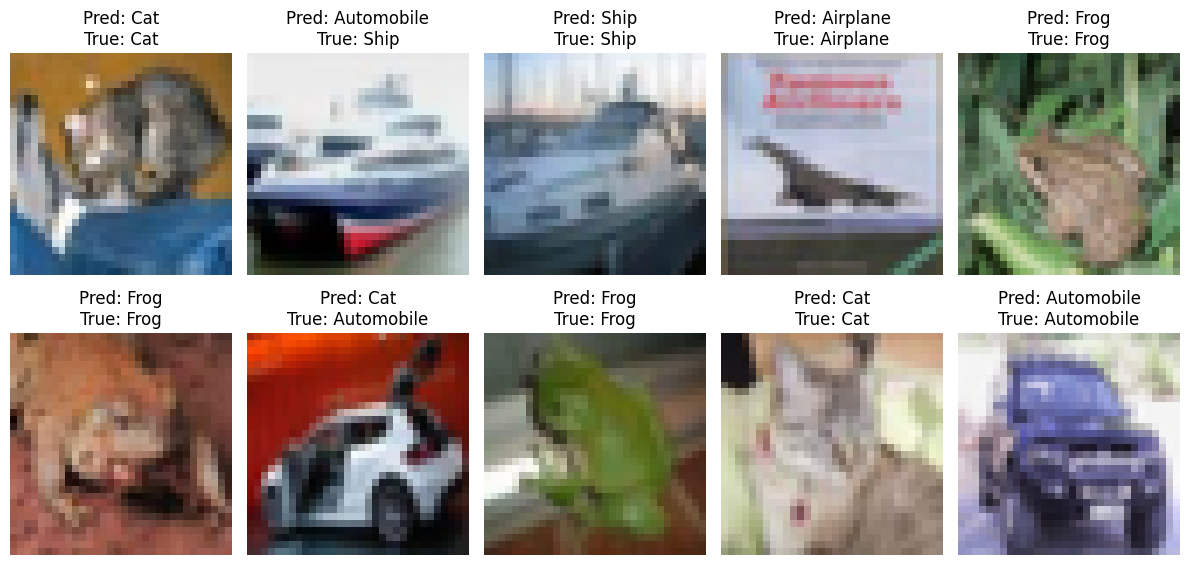

[3 1 8 0 6 6 3 6 3 1 0 9 3 7 9 8 5 7 8 6]
Predicted classes:
 ['Cat' 'Automobile' 'Ship' 'Airplane' 'Frog' 'Frog' 'Cat' 'Frog' 'Cat'
 'Automobile' 'Airplane' 'Truck' 'Cat' 'Horse' 'Truck' 'Ship' 'Dog'
 'Horse' 'Ship' 'Frog']


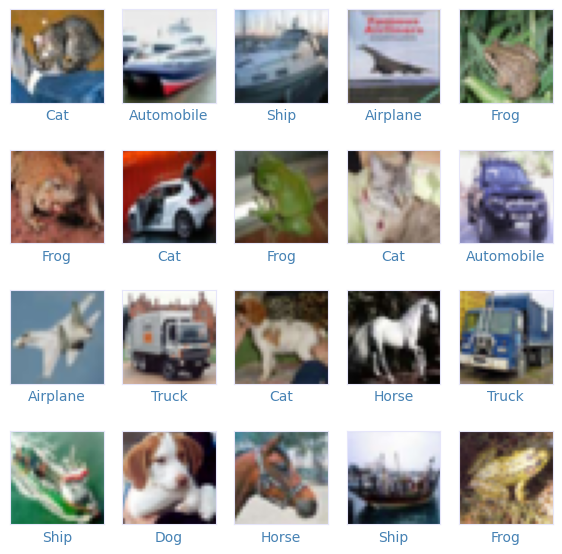

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Accuracy:0.75

[[740  21  70  33  14   9  12  16  45  40]
 [  8 878   3  12   4   6  10   3  12  64]
 [ 46   2 672  83  39  52  62  33   8   3]
 [ 15   2  75 631  32 131  78  25   4   7]
 [  9   6  77  95 654  42  68  42   5   2]
 [ 10   3  60 194  19 651  23  38   0   2]
 [  5   1  41  60  12  20 845   8   5   3]
 [  6   5  35  49  34  56   7 801   1   6]
 [ 44  19  12  30   7   7  10   4 846  21]
 [ 18  73   9  31   3   5   8  11  14 828]]


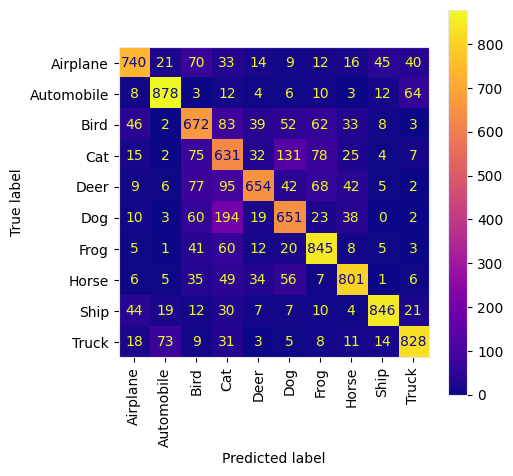

In [ ]:
kernel = (3, 3)
pool = (2, 2)

model = keras.models.Sequential([
    keras.Input(shape=(32, 32, 3)),

    # Conv Block 1
    keras.layers.Conv2D(32, kernel, padding='same', activation='relu'),
    keras.layers.Conv2D(32, kernel, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=pool),

    # Conv Block 2
    keras.layers.Conv2D(64, kernel, padding='same', activation='relu'),
    keras.layers.Conv2D(64, kernel, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=pool),

    # Conv Block 3
    keras.layers.Conv2D(64, kernel, padding='same', activation='relu'),
    keras.layers.Conv2D(64, kernel, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=pool),

    # Classifier
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])


print(model.summary())

print(model.layers)
conv1 = model.layers[0]  # first convolutional layer
print(f'\nFirst convolutional layer name: {conv1.name}')


weights, biases = conv1.get_weights()
print(f'Layer weights shape:\n{weights.shape}')
print(f'\nLayer weights:\n{weights}')
print(f'\nLayer biases shape:\n{biases.shape}')
print(f'\nBiases:\n{biases}')


cifar10 = keras.datasets.cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()


print(f'Dataset shape: {X_train.shape}')
print(f'First instance shape: {X_train[0].shape}')
print(f'\nFirst instance:\n {X_train[0]}')
import matplotlib.pyplot as plt
plt.imshow(X_train[0])
plt.title(f"Classe: {y_train[0][0]}")
plt.axis('off')
plt.show()
# Nomes corretos das classes CIFAR-10
class_names = [
    "Airplane", "Automobile", "Bird", "Cat", "Deer",
    "Dog", "Frog", "Horse", "Ship", "Truck"
]
# Verifica a classe da primeira instância
# Access the integer value from the one-element array
print(f'Class name of first instance: {class_names[y_train[0][0]]}')
# Visualização das primeiras 25 imagens com suas classes
plt.rc('axes', edgecolor='lavender')
fig = plt.figure(figsize=(7, 7))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])  # sem cmap para manter cores RGB
    # Access the integer value from the one-element array for each label
    plt.xlabel(class_names[y_train[i][0]], color='steelblue')
plt.tight_layout()
plt.show()


# Normaliza todo o conjunto de treino e teste
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0
# Divide o conjunto de validação (primeiras 5.000 instâncias)
X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]


# Adam optimizer
from tensorflow.keras.optimizers import Adam
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(learning_rate=1e-3),
              metrics=['sparse_categorical_accuracy'])



history = model.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=64,  # você pode ajustar conforme a capacidade da GPU
    validation_data=(X_valid, y_valid)
)


# Plot: Accuracy
plt.figure(figsize=(8, 4))
plt.plot(history.history['sparse_categorical_accuracy'], label='Train Accuracy')
plt.plot(history.history['val_sparse_categorical_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.grid(True)
plt.legend()
plt.show()
# Plot: Loss
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()


model.evaluate(X_test, y_test)


X_new = X_test[:20]
y_proba = model.predict(X_new)
print(f'Probability scores:\n {y_proba.round(2)}')


plt.figure(figsize=(12, 6))
# Calculate predicted classes for the first 20 images
y_pred_all = np.argmax(y_proba, axis=1)
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i])
    plt.axis('off')
    # Use the pre-calculated predicted class for the current image
    plt.title(f"Pred: {class_names[y_pred_all[i]]}\nTrue: {class_names[y_test[i][0]]}") # Access the single value in y_test
plt.tight_layout()
plt.show()


classes_y = np.argmax(y_proba, axis=1)
print(classes_y)
print(f'Predicted classes:\n {np.array(class_names)[classes_y]}')



plt.rc('axes',edgecolor='lavender')
fig = plt.figure(figsize=(7, 7))
for i in range(20):  # First 20 instances
    plt.subplot(4, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_new[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[classes_y[i]], color='steelblue')
plt.show()



from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
y_proba = model.predict(X_test)
test_pred = np.argmax(y_proba, axis=1)
# Accuracy
acc = accuracy_score(test_pred, y_test)
print(f'Accuracy:{acc:.2f}\n')
# Confusion matrix
cm = confusion_matrix(y_test, test_pred)
print(confusion_matrix(y_test, test_pred))
fig, ax = plt.subplots(figsize=(5, 5))
ConfusionMatrixDisplay.from_predictions(
    y_test, test_pred, display_labels=class_names, xticks_rotation="vertical",
    ax=ax, colorbar=True, cmap="plasma")
plt.show()





Melhorou um pouquinho, mas foi basicamente um ajuste somente nas camadas.

# Experimento 3:

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 669,354 (2.55 MB)

 Trainable params: 669,354 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

None
[<Conv2D name=conv2d_24, built=True>, <Conv2D name=conv2d_25, built=True>, <MaxPooling2D name=max_pooling2d_15, built=True>, <Conv2D name=conv2d_26, built=True>, <Conv2D name=conv2d_27, built=True>, <MaxPooling2D name=max_pooling2d_16, built=True>, <Conv2D name=conv2d_28, built=True>, <Conv2D name=conv2d_29, built=True>, <MaxPooling2D name=max_pooling2d_17, built=True>, <Flatten name=flatten_5, built=True>, <Dense name=dense_10, built=True>, <Dense name=dense_11, built=True>]

First convolutional layer name: conv2d_24
Layer weights shape:
(3, 3, 3, 32)

Layer weights:
[[[[ 0.08046229  0.04304549 -0.10282495  0.02597006  0.10225323
    -0.13095017  0.12052415  0.11214443  0.06990486  0.04115941
    -0.10041378 -0.01509456  0.03512926 -0.07899085 -0.0308817
    -0.12922674 -0.13709588 -0.02363693 -0.0589451   0.13757394
    -0.02183532 -0.08686183  0.10104193 -0.0052079  -0.04202264
     0.01888599  0.0143393  -0.1120377   0.0030081  -0.00121
     0.09822379  0.08387545]
   [ 0.0072

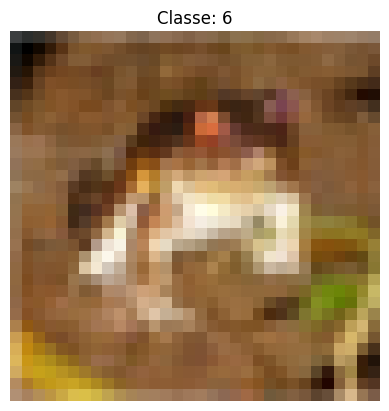

Class name of first instance: Frog


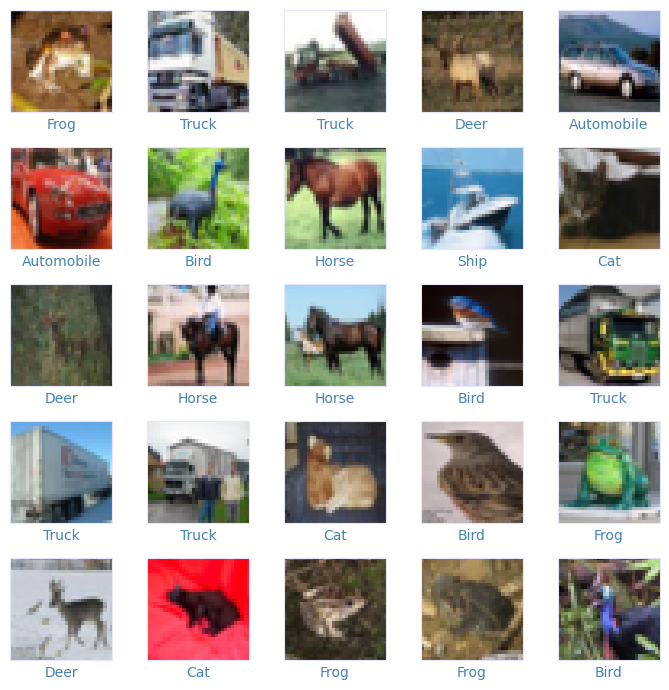

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


704/704 ━━━━━━━━━━━━━━━━━━━━ 31s 40ms/step - loss: 1.8846 - sparse_categorical_accuracy: 0.3003 - val_loss: 1.3176 - val_sparse_categorical_accuracy: 0.5194 - learning_rate: 0.0010
Epoch 2/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step - loss: 1.2862 - sparse_categorical_accuracy: 0.5352 - val_loss: 1.1127 - val_sparse_categorical_accuracy: 0.6034 - learning_rate: 0.0010
Epoch 3/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 40s 37ms/step - loss: 1.0805 - sparse_categorical_accuracy: 0.6170 - val_loss: 0.9636 - val_sparse_categorical_accuracy: 0.6632 - learning_rate: 0.0010
Epoch 4/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step - loss: 0.9643 - sparse_categorical_accuracy: 0.6576 - val_loss: 0.8257 - val_sparse_categorical_accuracy: 0.7064 - learning_rate: 0.0010
Epoch 5/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step - loss: 0.8776 - sparse_categorical_accuracy: 0.6891 - val_loss: 0.7745 - val_sparse_categorical_accuracy: 0.7304 - learning_rate: 0.0010
Epoch 6/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/st

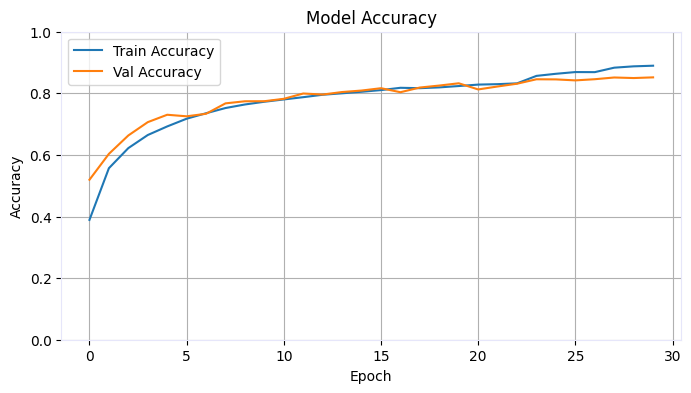

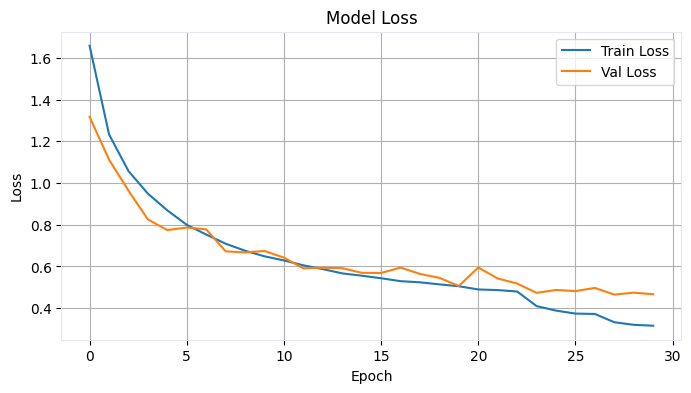

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.5281 - sparse_categorical_accuracy: 0.8412
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step
Probability scores:
 [[0.   0.   0.   0.78 0.   0.21 0.   0.   0.   0.  ]
 [0.   0.05 0.   0.   0.   0.   0.   0.   0.95 0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   1.   0.  ]
 [0.89 0.01 0.   0.   0.   0.   0.   0.   0.1  0.  ]
 [0.   0.   0.   0.   0.   0.   0.99 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   1.   0.   0.   0.  ]
 [0.   0.81 0.   0.   0.   0.   0.   0.   0.   0.19]
 [0.   0.   0.   0.04 0.05 0.   0.91 0.   0.   0.  ]
 [0.   0.   0.   0.99 0.01 0.   0.   0.   0.   0.  ]
 [0.   0.94 0.   0.   0.   0.   0.   0.   0.04 0.02]
 [1.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   1.  ]
 [0.   0.   0.07 0.31 0.28 0.28 0.04 0.02 0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   1.  ]
 [0.   0.07 0.   0.   0.   0.   0.01 0.   0.92 0.  

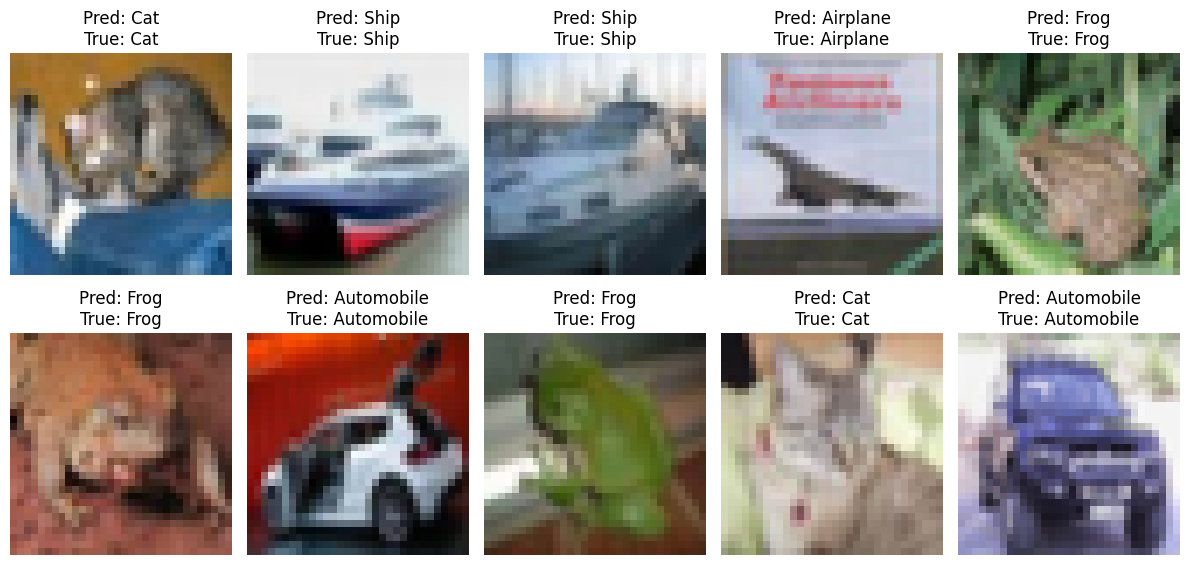

[3 8 8 0 6 6 1 6 3 1 0 9 3 7 9 8 5 7 8 6]
Predicted classes:
 ['Cat' 'Ship' 'Ship' 'Airplane' 'Frog' 'Frog' 'Automobile' 'Frog' 'Cat'
 'Automobile' 'Airplane' 'Truck' 'Cat' 'Horse' 'Truck' 'Ship' 'Dog'
 'Horse' 'Ship' 'Frog']
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Accuracy:0.84

[[874   9  16  11   6   2   2  10  34  36]
 [  8 939   0   1   0   0   4   0   9  39]
 [ 44   4 752  40  40  32  54  19   6   9]
 [ 15   6  30 696  45 101  52  22  13  20]
 [ 11   3  44  39 792  20  44  43   3   1]
 [  9   2  23 114  26 755  25  30   5  11]
 [  6   5  24  34  16   7 896   4   6   2]
 [ 14   3  21  16  21  27   4 882   4   8]
 [ 47  15   6   8   3   2   2   1 892  24]
 [ 17  39   2   3   0   0   4   4  10 921]]


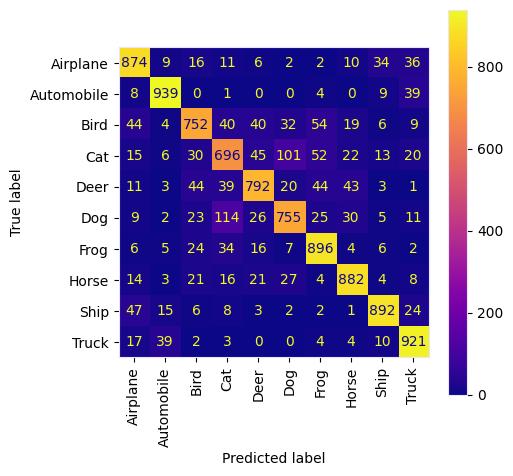

In [ ]:
kernel = (3, 3)
pool = (2, 2)

model = keras.models.Sequential([
    keras.Input(shape=(32, 32, 3)),

    # Conv Block 1
    keras.layers.Conv2D(32, kernel, padding='same', activation='relu'),
    keras.layers.Conv2D(32, kernel, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=pool),

    # Conv Block 2
    keras.layers.Conv2D(64, kernel, padding='same', activation='relu'),
    keras.layers.Conv2D(64, kernel, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=pool),

    # Conv Block 3
    keras.layers.Conv2D(64, kernel, padding='same', activation='relu'),
    keras.layers.Conv2D(64, kernel, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=pool),

    # Classifier
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])


print(model.summary())

print(model.layers)
conv1 = model.layers[0]  # first convolutional layer
print(f'\nFirst convolutional layer name: {conv1.name}')


weights, biases = conv1.get_weights()
print(f'Layer weights shape:\n{weights.shape}')
print(f'\nLayer weights:\n{weights}')
print(f'\nLayer biases shape:\n{biases.shape}')
print(f'\nBiases:\n{biases}')


cifar10 = keras.datasets.cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()


print(f'Dataset shape: {X_train.shape}')
print(f'First instance shape: {X_train[0].shape}')
print(f'\nFirst instance:\n {X_train[0]}')
import matplotlib.pyplot as plt
plt.imshow(X_train[0])
plt.title(f"Classe: {y_train[0][0]}")
plt.axis('off')
plt.show()
# Nomes corretos das classes CIFAR-10
class_names = [
    "Airplane", "Automobile", "Bird", "Cat", "Deer",
    "Dog", "Frog", "Horse", "Ship", "Truck"
]
# Verifica a classe da primeira instância
# Access the integer value from the one-element array
print(f'Class name of first instance: {class_names[y_train[0][0]]}')
# Visualização das primeiras 25 imagens com suas classes
plt.rc('axes', edgecolor='lavender')
fig = plt.figure(figsize=(7, 7))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])  # sem cmap para manter cores RGB
    # Access the integer value from the one-element array for each label
    plt.xlabel(class_names[y_train[i][0]], color='steelblue')
plt.tight_layout()
plt.show()


# Normaliza todo o conjunto de treino e teste
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0
# Divide o conjunto de validação (primeiras 5.000 instâncias)
X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]


# Adam optimizer
from tensorflow.keras.optimizers import Adam
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(learning_rate=1e-3),
              metrics=['sparse_categorical_accuracy'])


from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)
]


from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(X_train)
# Substitui o fit tradicional:
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    validation_data=(X_valid, y_valid),
    epochs=30,
    callbacks=callbacks
)


# Plot: Accuracy
plt.figure(figsize=(8, 4))
plt.plot(history.history['sparse_categorical_accuracy'], label='Train Accuracy')
plt.plot(history.history['val_sparse_categorical_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.grid(True)
plt.legend()
plt.show()
# Plot: Loss
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()


model.evaluate(X_test, y_test)


X_new = X_test[:20]
y_proba = model.predict(X_new)
print(f'Probability scores:\n {y_proba.round(2)}')


plt.figure(figsize=(12, 6))
# Calculate predicted classes for the first 20 images
y_pred_all = np.argmax(y_proba, axis=1)
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i])
    plt.axis('off')
    # Use the pre-calculated predicted class for the current image
    plt.title(f"Pred: {class_names[y_pred_all[i]]}\nTrue: {class_names[y_test[i][0]]}") # Access the single value in y_test
plt.tight_layout()
plt.show()


classes_y = np.argmax(y_proba, axis=1)
print(classes_y)
print(f'Predicted classes:\n {np.array(class_names)[classes_y]}')



from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
y_proba = model.predict(X_test)
test_pred = np.argmax(y_proba, axis=1)
# Accuracy
acc = accuracy_score(test_pred, y_test)
print(f'Accuracy:{acc:.2f}\n')
# Confusion matrix
cm = confusion_matrix(y_test, test_pred)
print(confusion_matrix(y_test, test_pred))
fig, ax = plt.subplots(figsize=(5, 5))
ConfusionMatrixDisplay.from_predictions(
    y_test, test_pred, display_labels=class_names, xticks_rotation="vertical",
    ax=ax, colorbar=True, cmap="plasma")
plt.show()



# Experimento 4:

Aqui vou usar tudo que tenho kkkk

Recapitulando:
Arquitetura
- 3 camadas "feature extraction"
- Classifier flatten -> softmax

Early stop, LR, Data Augumentation

Epoch 1/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 39s 44ms/step - loss: 1.7575 - sparse_categorical_accuracy: 0.3795 - val_loss: 1.6500 - val_sparse_categorical_accuracy: 0.4320 - learning_rate: 0.0010
Epoch 2/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step - loss: 1.1277 - sparse_categorical_accuracy: 0.5983 - val_loss: 1.1203 - val_sparse_categorical_accuracy: 0.6128 - learning_rate: 0.0010
Epoch 3/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 41s 37ms/step - loss: 0.9421 - sparse_categorical_accuracy: 0.6701 - val_loss: 0.9288 - val_sparse_categorical_accuracy: 0.6800 - learning_rate: 0.0010
Epoch 4/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step - loss: 0.8523 - sparse_categorical_accuracy: 0.7022 - val_loss: 0.7619 - val_sparse_categorical_accuracy: 0.7304 - learning_rate: 0.0010
Epoch 5/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step - loss: 0.7741 - sparse_categorical_accuracy: 0.7298 - val_loss: 0.8476 - val_sparse_categorical_accuracy: 0.7206 - learning_rate: 0.0010
Epoch 6/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 

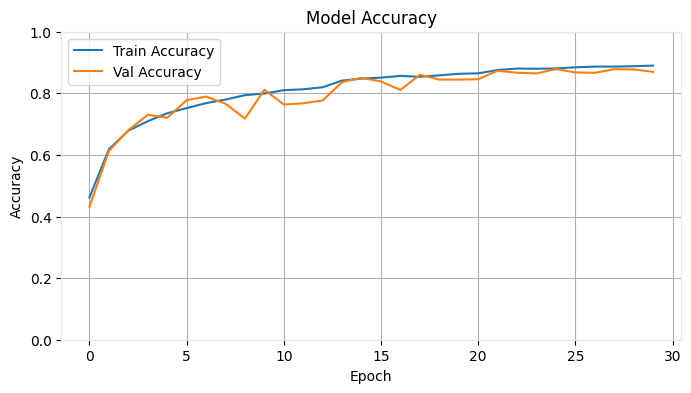

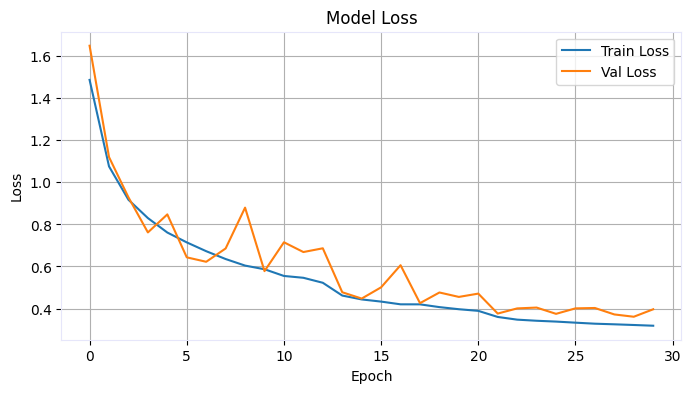

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


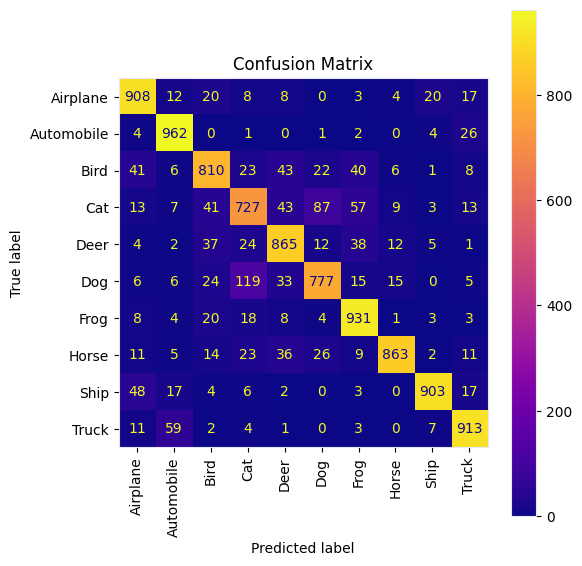


Classification Report:
              precision    recall  f1-score   support

    Airplane       0.86      0.91      0.88      1000
  Automobile       0.89      0.96      0.93      1000
        Bird       0.83      0.81      0.82      1000
         Cat       0.76      0.73      0.74      1000
        Deer       0.83      0.86      0.85      1000
         Dog       0.84      0.78      0.81      1000
        Frog       0.85      0.93      0.89      1000
       Horse       0.95      0.86      0.90      1000
        Ship       0.95      0.90      0.93      1000
       Truck       0.90      0.91      0.91      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



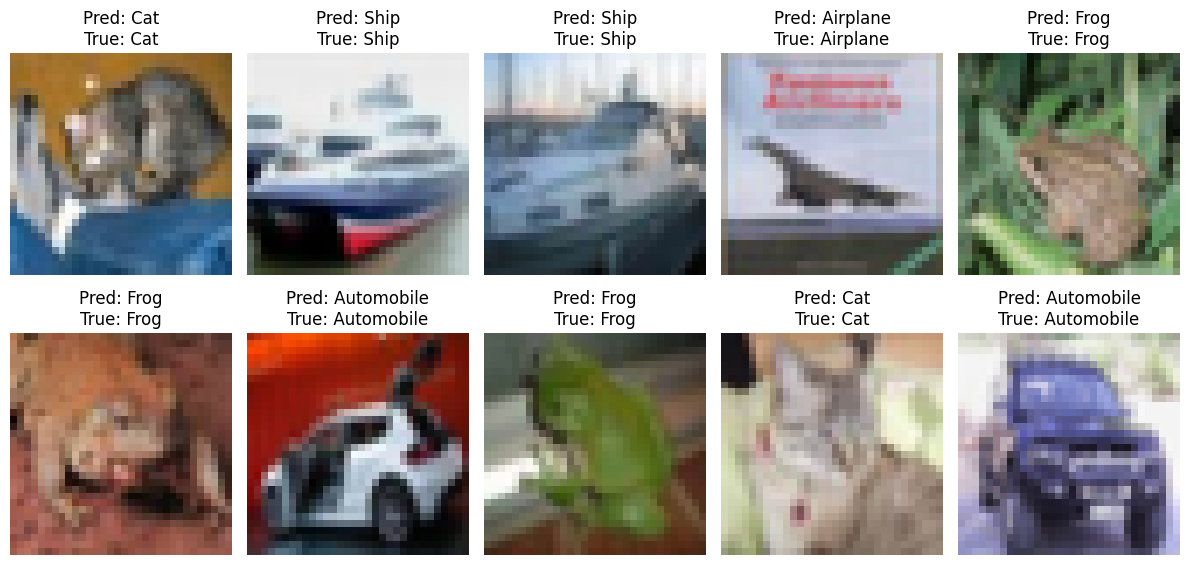

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

# --- Dataset CIFAR-10 ---
class_names = [
    "Airplane", "Automobile", "Bird", "Cat", "Deer",
    "Dog", "Frog", "Horse", "Ship", "Truck"
]

(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

# Normalização
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

# Separar validação
X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

# --- Data Augmentation ---
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(X_train)

# --- Modelo CNN ---
kernel = (3, 3)
pool = (2, 2)

model = keras.models.Sequential([
    keras.Input(shape=(32, 32, 3)),

    layers.Conv2D(32, kernel, padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Conv2D(32, kernel, padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=pool),

    layers.Conv2D(64, kernel, padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Conv2D(64, kernel, padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=pool),

    layers.Conv2D(64, kernel, padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Conv2D(64, kernel, padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=pool),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

# Compilar
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    metrics=['sparse_categorical_accuracy']
)

# Callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)
]

# Treinar
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    validation_data=(X_valid, y_valid),
    epochs=30,
    callbacks=callbacks
)

# --- Avaliação ---
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'\nTest Accuracy: {test_acc:.4f}')

# --- Gráficos de treino ---
plt.figure(figsize=(8, 4))
plt.plot(history.history['sparse_categorical_accuracy'], label='Train Accuracy')
plt.plot(history.history['val_sparse_categorical_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

# --- Predição em lote ---
y_proba = model.predict(X_test)
y_pred = np.argmax(y_proba, axis=1)

# --- Matriz de Confusão ---
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(6, 6))
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, display_labels=class_names,
    xticks_rotation="vertical", ax=ax, cmap="plasma", colorbar=True
)
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

# --- Classification Report ---
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))

# --- Exemplo de 10 imagens previstas ---
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i])
    plt.axis('off')
    plt.title(f"Pred: {class_names[y_pred[i]]}\nTrue: {class_names[y_test[i][0]]}")
plt.tight_layout()
plt.show()


*Les carottes sont cuites!* 🥕🥕🥕

Observando as curvas de loss e accuracy obtidos no experimento 2, nos parece haver overfitting, pois, no conjunto de treino, o valor de acurácia sobe, quase atingindo 100% e o loss é baixo, e no conjunto de validação, a acurácia cai bastante, com loss subindo, além de que, a curva de loss de treino está descendo e a de loss de validação está subindo. Avaliando-se a predição no conjunto de testes, obteve-se um percentual de acerto de 74%, o que indica um desempenho ruim.

Conforme proposto no exercício, vamos avaliar a execuçãõ considerando uma arquitetura composta por 6 camadas de convolução para a extração de features, com maxpooling e dropouts a cada 2 camadas, e para a classificação, 2 camadas densas com dropout entre elas, finalizando com softmax.

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


704/704 ━━━━━━━━━━━━━━━━━━━━ 302s 425ms/step - loss: 1.9935 - sparse_categorical_accuracy: 0.2475 - val_loss: 1.4393 - val_sparse_categorical_accuracy: 0.4636
Epoch 2/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 293s 416ms/step - loss: 1.4947 - sparse_categorical_accuracy: 0.4542 - val_loss: 1.1956 - val_sparse_categorical_accuracy: 0.5658
Epoch 3/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 295s 419ms/step - loss: 1.3088 - sparse_categorical_accuracy: 0.5267 - val_loss: 1.1700 - val_sparse_categorical_accuracy: 0.5750
Epoch 4/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 294s 417ms/step - loss: 1.1931 - sparse_categorical_accuracy: 0.5735 - val_loss: 0.9741 - val_sparse_categorical_accuracy: 0.6526
Epoch 5/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 294s 418ms/step - loss: 1.1100 - sparse_categorical_accuracy: 0.6063 - val_loss: 0.9416 - val_sparse_categorical_accuracy: 0.6616
Epoch 6/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 292s 415ms/step - loss: 1.0449 - sparse_categorical_accuracy: 0.6274 - val_loss: 0.8783 - val_sparse_categorical_accuracy

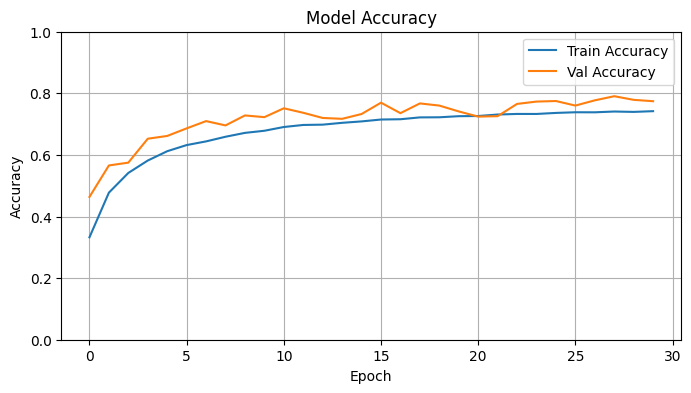

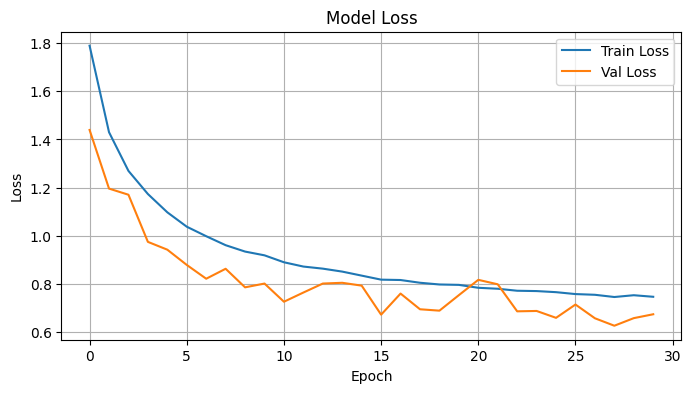

313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 53ms/step


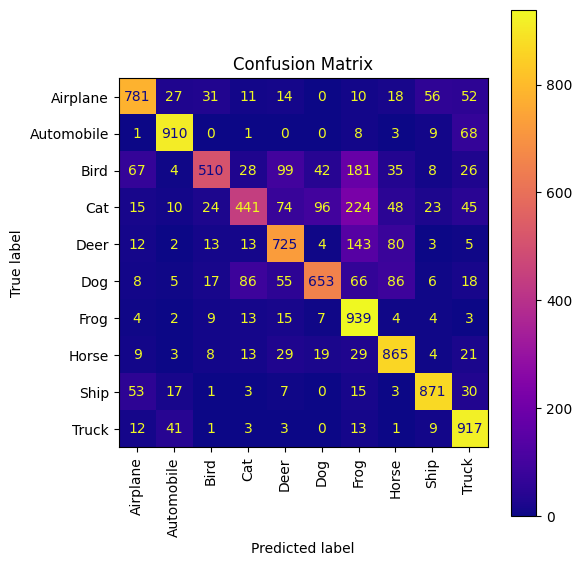


Classification Report:
              precision    recall  f1-score   support

    Airplane       0.81      0.78      0.80      1000
  Automobile       0.89      0.91      0.90      1000
        Bird       0.83      0.51      0.63      1000
         Cat       0.72      0.44      0.55      1000
        Deer       0.71      0.72      0.72      1000
         Dog       0.80      0.65      0.72      1000
        Frog       0.58      0.94      0.71      1000
       Horse       0.76      0.86      0.81      1000
        Ship       0.88      0.87      0.87      1000
       Truck       0.77      0.92      0.84      1000

    accuracy                           0.76     10000
   macro avg       0.77      0.76      0.75     10000
weighted avg       0.77      0.76      0.75     10000



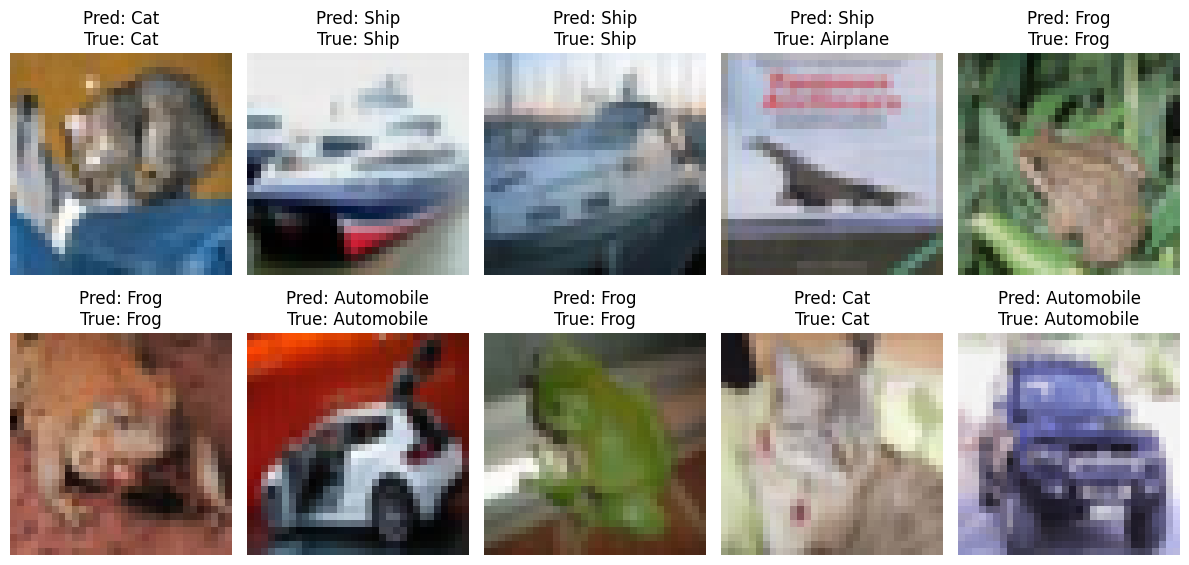

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

# --- Dataset CIFAR-10 ---
class_names = [
    "Airplane", "Automobile", "Bird", "Cat", "Deer",
    "Dog", "Frog", "Horse", "Ship", "Truck"
]

(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

# Normalização
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

# Separar validação
X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

# --- Data Augmentation ---
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
#datagen.fit(X_train)

# --- Modelo CNN ---
kernel = (3, 3)
pool = (2, 2)

model = keras.models.Sequential([
    #keras.Input(shape=(32, 32, 3)),

    layers.Conv2D(32, kernel, padding='same', activation='relu', input_shape=(32, 32, 3)),
    layers.Conv2D(32, kernel, padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=pool),
    layers.Dropout(0.25),

    layers.Conv2D(64, kernel, padding='same', activation='relu'),
    layers.Conv2D(64, kernel, padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=pool),
    layers.Dropout(0.25),

    layers.Conv2D(64, kernel, padding='same', activation='relu'),
    layers.Conv2D(64, kernel, padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=pool),
    layers.Dropout(0.25),

    layers.Flatten(),

    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Compilar
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    metrics=['sparse_categorical_accuracy']
)

# Callbacks
#callbacks = [
#    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
#    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)
#]

# Treinar
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    validation_data=(X_valid, y_valid),
    epochs=30 #,
    #callbacks=callbacks
)

# --- Avaliação ---
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'\nTest Accuracy: {test_acc:.4f}')

# --- Gráficos de treino ---
plt.figure(figsize=(8, 4))
plt.plot(history.history['sparse_categorical_accuracy'], label='Train Accuracy')
plt.plot(history.history['val_sparse_categorical_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

# --- Predição em lote ---
y_proba = model.predict(X_test)
y_pred = np.argmax(y_proba, axis=1)

# --- Matriz de Confusão ---
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(6, 6))
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, display_labels=class_names,
    xticks_rotation="vertical", ax=ax, cmap="plasma", colorbar=True
)
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

# --- Classification Report ---
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))

# --- Exemplo de 10 imagens previstas ---
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i])
    plt.axis('off')
    plt.title(f"Pred: {class_names[y_pred[i]]}\nTrue: {class_names[y_test[i][0]]}")
plt.tight_layout()
plt.show()